In [2]:
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import ggplot
import os
import pandas as pd
%matplotlib inline

scores = {}
scores['MCAR'] = {}
scores['MCAR']['0.1'] = []
scores['MCAR']['0.2'] = []
scores['MCAR']['0.3'] = []
scores['MCAR']['0.4'] = []
scores['MCAR']['0.5'] = []

scores['MAR'] = {}
scores['MNAR'] = {}

for filename in os.listdir('./data/scores/'):
    score = pkl.load(open('./data/scores/' + filename, 'rb'))
    if filename.startswith('MCAR'):
        if filename.split('_')[1] not in scores['MCAR']:
            scores['MCAR'][filename.split('_')[1]] = []
        for key, value in score.iteritems():
            scores['MCAR'][filename.split('_')[1]].append(value)
    elif filename.startswith('MAR'):
        if filename.split('_')[2] not in scores['MAR']:
            scores['MAR'][filename.split('_')[2]] = []
        for key, value in score.iteritems():
             scores['MAR'][filename.split('_')[2]].extend(value)
#         if 
#         scores['MAR'].append(score)
    else:
        if filename.split('_')[3] not in scores['MNAR']:
            scores['MNAR'][filename.split('_')[3]] = []
        for key, value in score.iteritems():
             scores['MNAR'][filename.split('_')[3]].extend(value)

/Users/Brett/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


OSError: [Errno 2] No such file or directory: './data/scores/'

In [2]:
sns.set_style("whitegrid")

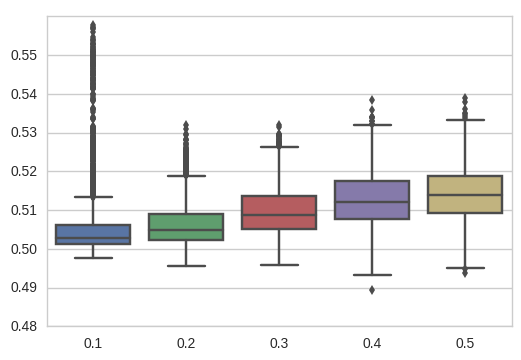

In [4]:
mcar = {'0.1': [], '0.2': [], '0.3': [], '0.4': [], '0.5': []}

for missing in scores['MCAR']:
    for results in scores['MCAR'][missing]:
        mcar[missing].extend(results['rfc'])
        
mcar_df = pd.DataFrame.from_dict(mcar)
mcar_df.to_csv('./data/prediction_scores/mcar.csv')
sns.boxplot(mcar_df)

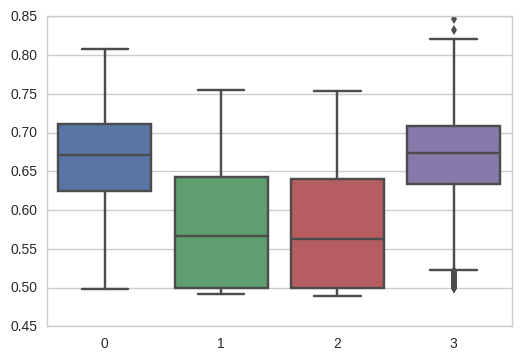

In [5]:
mar_df = pd.DataFrame.from_dict(scores['MAR'])
mar_df.to_csv('./data/prediction_scores/mar.csv')

sns.boxplot(mar_df)

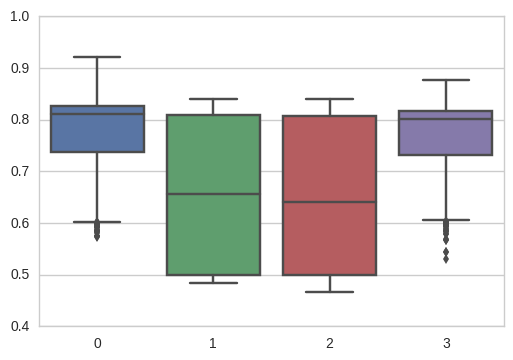

In [6]:
mnar_df = pd.DataFrame.from_dict(scores['MNAR'])
mnar_df.to_csv('./data/prediction_scores/mnar.csv')
sns.boxplot(mnar_df)

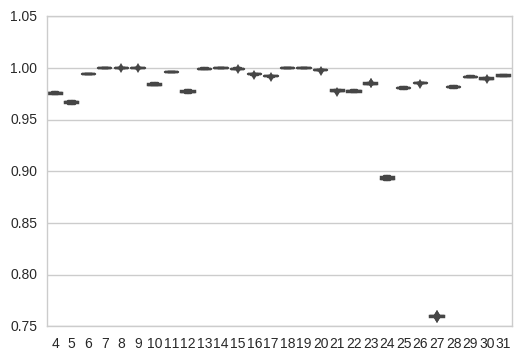

In [8]:
score = pkl.load(open('./data/all_patients/all_patients_vals_scores.p', 'rb'))
#print(score) 
rfc_dict = {}
for key in score:
    rfc_dict[key] = score[key]['rfc']

real_df = pd.DataFrame.from_dict(rfc_dict)
real_df.to_csv('./data/prediction_scores/real28.csv')
sns.boxplot(real_df)

{4: {'rfc': [0.57353693175768927, 0.56803026663601275, 0.56461202529494414, 0.55460795624443637, 0.55722990969164699, 0.5546255709750485, 0.57485095742027925, 0.57616486993231997, 0.5465483338660716, 0.56348012925258717], 'sgd': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]}, 5: {'rfc': [0.51073219368637734, 0.50984079249955783, 0.50943341963773592, 0.51211941634637548, 0.51624570349102739, 0.50759164992377237, 0.51486437719649969, 0.51803325612575424, 0.51213647835873832, 0.51023998577680185], 'sgd': [0.5, 0.5, 0.5, 0.49999410342590955, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]}, 6: {'rfc': [0.89895903650109532, 0.90077509888181273, 0.90074681046890648, 0.89820026212787873, 0.90043577100637096, 0.8995526343954956, 0.90001869084454178, 0.90103941771578744, 0.90111427148709478, 0.89994327549617714], 'sgd': [0.50001539977824327, 0.49999668265019936, 0.5, 0.5, 0.5, 0.5, 0.50001539977824327, 0.50005224227106593, 0.5, 0.5]}, 7: {'rfc': [0.73718683669360274, 0.75334909727281429, 0.74100446480387117

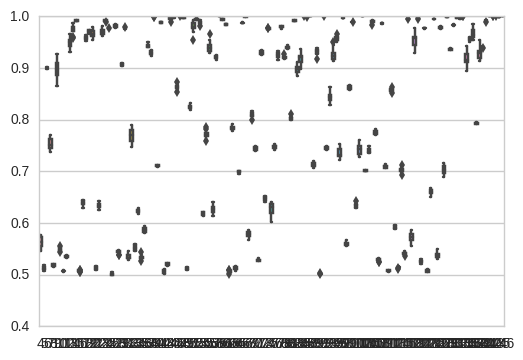

In [35]:
score = pkl.load(open('./data/all_patients/all_patients_all_scores.p', 'rb'))
print(score) 
rfc_dict = {}
for key in score:
    rfc_dict[key] = score[key]['rfc']
    
real_df = pd.DataFrame.from_dict(rfc_dict)
real_df.to_csv('./data/all_patients/all_labs.csv')

sns.boxplot(real_df)

In [34]:
# MCAR
mcar_scores = pd.DataFrame(columns=['Method', 'Percent Missing', 'Trial', 'RMSE'])

i = 0
for filename in os.listdir('/media/brett/Drive/imputation/output'):
    if filename.startswith('MCAR') and filename.split('.')[-1] == 'p':
        missing = filename.split('_')[1]
        trial = filename.split('_')[2]
        
        scores = pkl.load(open('/media/brett/Drive/imputation/output/' + filename, 'rb'))
        for s in scores:
            if len(scores[s]) > 0:
                mcar_scores.loc[i] = [s, missing, trial, scores[s][0]]
                i += 1
            
print(mcar_scores.head())
mcar_scores.to_csv('./output/imputation_scores/mcar.csv')

                   Method Percent Missing Trial      RMSE
0                knn_6000             0.1     0  0.079933
1                 si_s_32             0.1     0  0.046521
2                  random             0.1     0  0.179239
3  MICE_col_lambda_reg_25             0.1     0  0.058675
4           simple_median             0.1     0  0.091193


In [36]:
import pickle as pkl

mnar_scores = pd.DataFrame(columns=['Method', 'Feature', 'Quartile', 'RMSE'])

# MAR
i = 0
for filename in os.listdir('/media/brett/Drive/imputation/output'):
    if filename.startswith('MAR') and filename.split('.')[-1] == 'p':
        feature = filename.split('_')[1]
        quartile = filename.split('_')[2]
        
        scores = pkl.load(open('/media/brett/Drive/imputation/output/' + filename, 'rb'))
        for s in scores:
            if len(scores[s]) > 0:
                mnar_scores.loc[i] = [s, feature, quartile, scores[s][0]]
                i += 1
        
        
# this is really MNAR***
print(mnar_scores.head())
mnar_df.to_csv('./output/imputation_scores/mnar.csv')

                   Method Feature Quartile      RMSE
0                knn_6000      10        0  0.011623
1                 si_s_32      10        0  0.009283
2                  random      10        0  0.015204
3  MICE_col_lambda_reg_25      10        0  0.011589
4           simple_median      10        0  0.011668


In [13]:
mnar_dict = {}

for filename in os.listdir('/media/brett/Drive/imputation/output'):
    if filename.startswith('MNAR') and filename.split('.')[-1] == 'p':
        feature1 = filename.split('_')[1]
        feature2 = filename.split('_')[2]
        quartile = filename.split('_')[3]
        
        if feature not in mnar_dict:
            mnar_dict[feature] = {}
        

MAR_3_0_0_None.p
MAR_3_1_0_None.p
MAR_3_2_0_None.p
MAR_3_3_0_None.p
